<a href="https://colab.research.google.com/github/MrunaliShigawan/RainfallPrediction/blob/master/Rainpredition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

url='https://raw.githubusercontent.com/MrunaliShigawan/RainfallPrediction/master/Weather.csv'

dataset = pd.read_csv(url)


In [ ]:
dataset.head(5)


,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
dataset.drop(pd.isnull(dataset).any(1).nonzero()[0], inplace = True)

X = dataset.iloc[: , 1:4].values #upperbound is omitted
y = dataset.iloc[:, 4].values.astype(int)
y_temp = dataset.iloc[:, 4].values

X[:,1:3]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


array([[51., 42.],
       [45., 36.],
       [45., 35.],
       ...,
       [46., 32.],
       [48., 34.],
       [50., 36.]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

ms = MinMaxScaler(feature_range=(0,1))
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)


0.8587084148727985
Our model has correctly predicted that there will be no rain for 2936 days.
Our model has correctly predicted that there will be rain for 1452 days.
[[2936    0]
 [ 722 1452]]


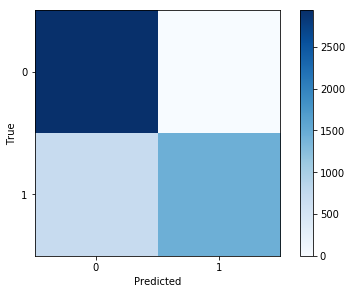

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=5)
scores.mean() 

cm = confusion_matrix(y_test, y_pred)
print('Our model has correctly predicted that there will be no rain for', cm[0,0] , 'days.')
print('Our model has correctly predicted that there will be rain for', cm[1,1] , 'days.')

cls_true = y_test
    
# Get the predicted classifications for the test-set.
cls_pred = y_pred

# Get the confusion matrix using sklearn.
cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

# Print the confusion matrix as text.
print(cm)

# Plot the confusion matrix as an image.
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Make various adjustments to the plot.
plt.tight_layout()
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, range(2))
plt.yticks(tick_marks, range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
    
# Ensure the plot is shown correctly with multiple plots
# in a single Notebook cell.
plt.show()


1.0
Our model has correctly predicted that there will be no rain for 2936 days.
Our model has correctly predicted that there will be rain for 2174 days.
[[2936    0]
 [   0 2174]]


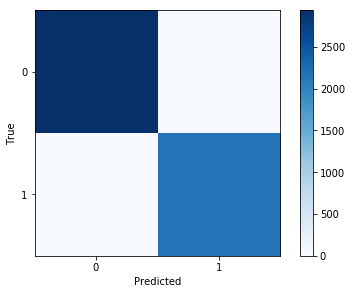

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_NB = gaussian.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_NB))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gaussian, X_train, y_train, cv=5)
scores.mean() 

cm1 = confusion_matrix(y_test, y_pred_NB)
print('Our model has correctly predicted that there will be no rain for', cm1[0,0] , 'days.')
print('Our model has correctly predicted that there will be rain for', cm1[1,1] , 'days.')

print(cm1)
# Plot the confusion matrix as an image.
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Blues)

# Make various adjustments to the plot.
plt.tight_layout()
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, range(2))
plt.yticks(tick_marks, range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
    
# Ensure the plot is shown correctly with multiple plots
# in a single Notebook cell.
plt.show()

1.0
[[2936    0]
 [   0 2174]]
Our model has correctly predicted that there will be no rain for 2936 days.
Our model has correctly predicted that there will be rain for 2174 days.


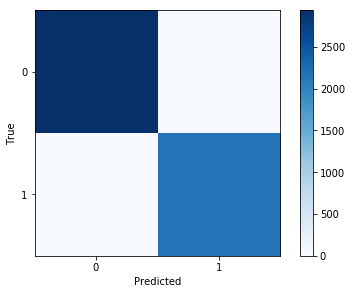

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_tree))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X_train, y_train, cv=5)
scores.mean() 

cls_true = y_test
    
# Get the predicted classifications for the test-set.
cls_pred = y_pred_tree

# Get the confusion matrix using sklearn.
cm2 = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

# Print the confusion matrix as text.
print(cm2)

print('Our model has correctly predicted that there will be no rain for', cm2[0,0] , 'days.')
print('Our model has correctly predicted that there will be rain for', cm2[1,1] , 'days.')
# Plot the confusion matrix as an image.
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)

# Make various adjustments to the plot.
plt.tight_layout()
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, range(2))
plt.yticks(tick_marks, range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
    
# Ensure the plot is shown correctly with multiple plots
# in a single Notebook cell.
plt.show()

1.0
[[2936    0]
 [   0 2174]]


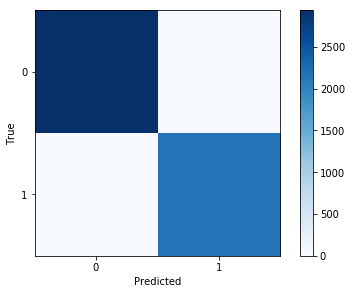

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb= nb.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_nb, normalize='false'))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train, y_train, cv=5)
scores.mean() 

cls_true = y_test
    
# Get the predicted classifications for the test-set.
cls_pred = y_pred_nb

# Get the confusion matrix using sklearn.
cm3 = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

# Print the confusion matrix as text.
print(cm3)

# Plot the confusion matrix as an image.
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Blues)

# Make various adjustments to the plot.
plt.tight_layout()
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, range(2))
plt.yticks(tick_marks, range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
    
# Ensure the plot is shown correctly with multiple plots
# in a single Notebook cell.
plt.show()